# Lab | Customer Analysis Final Round


For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.

## 01 - Problem (case study)

- Data Description.

- Goal.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import statsmodels.api as sm
import math

from sklearn.preprocessing import OneHotEncoder, Normalizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

## 02 - Getting Data

Read the .csv file.

In [31]:
df = pd.read_csv('marketing_customer_analysis.csv')

## 03 - Cleaning/Wrangling/EDA

- Change headers names.
- Deal with NaN values.
- Categorical Features.
- Numerical Features.
- Exploration.

In [32]:
#Change headers names.
cols = df.columns.str.lower()
new_columns = [col.replace(" ", "_") for col in cols]
df.columns = new_columns

In [33]:
df.shape

(9134, 24)

In [34]:
pd.to_datetime(df["effective_to_date"])
df["effective_to_date"] = pd.to_datetime(df["effective_to_date"], errors="coerce")

In [35]:
df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [36]:
df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [37]:
#Numerical Features.
df_num = pd.DataFrame(df.select_dtypes(include = np.number))
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [38]:
# Categorical Features.
df_obj = pd.DataFrame(df.select_dtypes(include = np.object))
df_obj

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


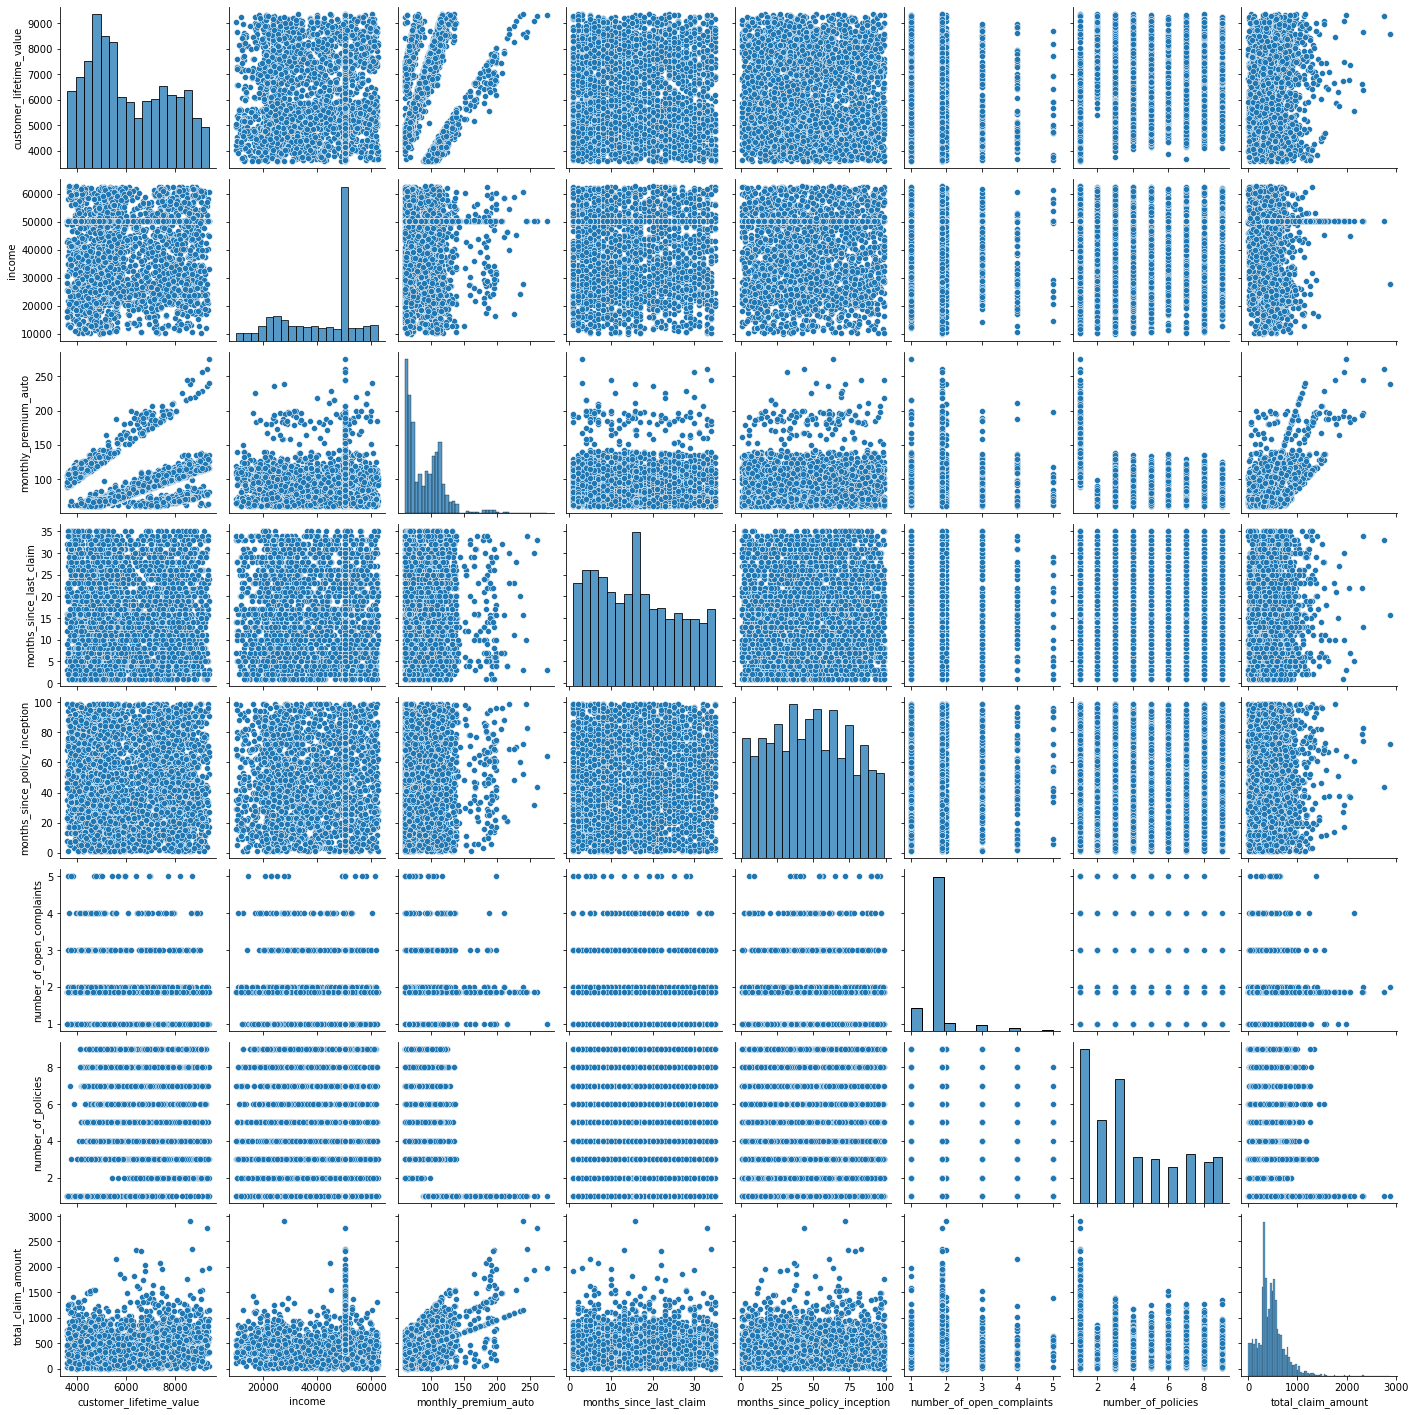

In [119]:
sns.pairplot(df_num)

In [121]:
X_num_matrix = df_num.corr()
X_num_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.050734,0.177745,-0.044789,0.007294,-0.014038,0.184325,0.070206
income,0.050734,1.000000,0.051481,-0.021519,0.034856,-0.013310,-0.021331,0.082450
monthly_premium_auto,0.177745,0.051481,1.000000,-0.020065,0.013948,0.001099,-0.328167,0.617092
months_since_last_claim,-0.044789,-0.021519,-0.020065,1.000000,-0.023975,0.011890,0.003115,-0.003623
months_since_policy_inception,0.007294,0.034856,0.013948,-0.023975,1.000000,0.049909,-0.026459,-0.009450
number_of_open_complaints,-0.014038,-0.013310,0.001099,0.011890,0.049909,1.000000,-0.001357,0.018279
number_of_policies,0.184325,-0.021331,-0.328167,0.003115,-0.026459,-0.001357,1.000000,-0.188020
total_claim_amount,0.070206,0.082450,0.617092,-0.003623,-0.009450,0.018279,-0.188020,1.000000


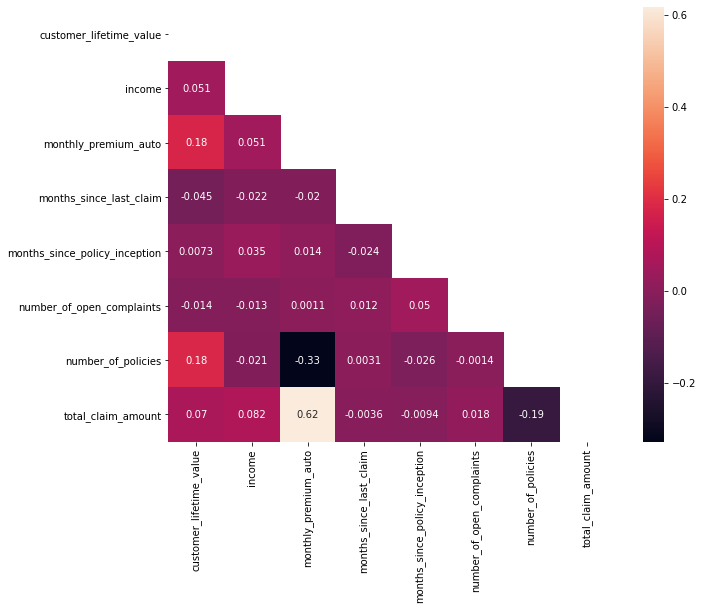

In [122]:
mask = np.zeros_like(X_num_matrix)

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(X_num_matrix, mask=mask, annot=True)
plt.show()


In [39]:
#Deal with NaN values.
df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [40]:
for column in df_num.columns: 
    df_num[column] = np.where(df_num[column]<=0, np.NAN, df_num[column])
    
for column in df_num.columns: 
    df_num[column] = df_num[column].fillna(df_num[column].mean())
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274.000000,69.0,32.0,5.0,1.865569,1.0,384.811147
1,6979.535903,50456.580461,94.0,13.0,42.0,1.865569,8.0,1131.464935
2,12887.431650,48767.000000,108.0,18.0,38.0,1.865569,2.0,566.472247
3,7645.861827,50456.580461,106.0,18.0,65.0,1.865569,7.0,529.881344
4,2813.692575,43836.000000,73.0,12.0,44.0,1.865569,1.0,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941.000000,73.0,18.0,89.0,1.865569,2.0,198.234764
9130,3096.511217,21604.000000,79.0,14.0,28.0,1.865569,1.0,379.200000
9131,8163.890428,50456.580461,85.0,9.0,37.0,3.000000,2.0,790.784983
9132,7524.442436,21941.000000,96.0,34.0,3.0,1.865569,3.0,691.200000


In [44]:
#Exploration.
y = df_num['total_claim_amount']
x = df_num.drop(['total_claim_amount'], axis=1)
x = sm.add_constant(x)
x_num = x.select_dtypes(include = np.number)
x_cat = x.select_dtypes(include = np.object)


model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_claim_amount   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     967.4
Date:                Tue, 15 Jun 2021   Prob (F-statistic):               0.00
Time:                        14:23:17   Log-Likelihood:                -62229.
No. Observations:                9134   AIC:                         1.245e+05
Df Residuals:                    9126   BIC:                         1.245e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [45]:
df.drop_duplicates(subset=None, keep="first", inplace=True)
df.shape

(9134, 24)

## 04 - Processing Data

- Dealing with outliers.
- Normalization.
- Encoding Categorical Data.
- Splitting into train set and test set.

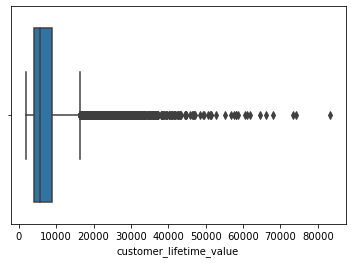

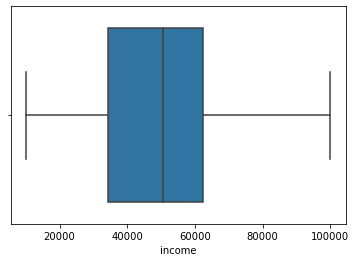

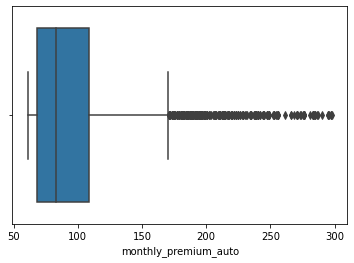

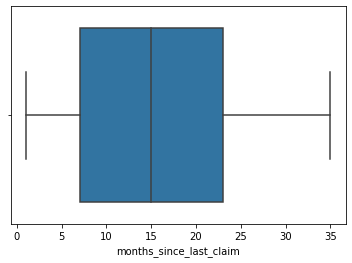

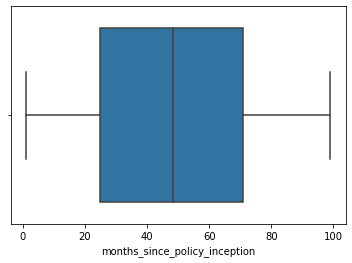

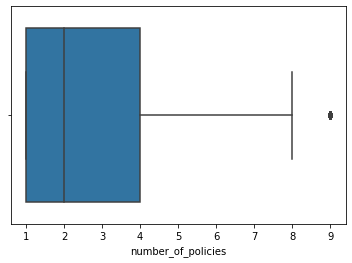

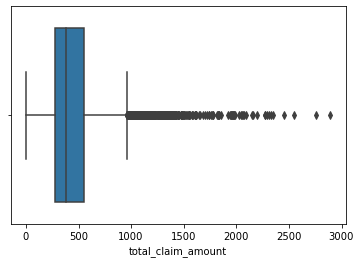

In [46]:
#Dealing with outliners.
for column in df_num.columns.drop("number_of_open_complaints"):
    sns.boxplot(df_num[column])
    plt.show()

In [47]:
iqr_list = []

for column in df_num.columns:
    iqr = np.percentile(df[column],75) - np.percentile(df[column],25) 
    iqr_list.append(iqr)

iqr_list = [round(i,2) for i in iqr_list]
print(iqr_list)

[4967.92, 62320.0, 41.0, 17.0, 47.0, 0.0, 3.0, 275.26]


In [48]:
upper_limit_list = []
lower_limit_list = []


for column in df_num.columns: 
    upper_limit = np.percentile(df[column],75) + 1.5*iqr
    upper_limit_list.append(upper_limit)
    lower_limit = np.percentile(df[column],25) - 1.5*iqr
    lower_limit_list.append(lower_limit)

upper_limit_list = [round(i,2) for i in upper_limit_list]  
lower_limit_list = [round(i,2) for i in lower_limit_list]    
    
print("upper_limit:" ,upper_limit_list, "lower_limit:", lower_limit_list)

upper_limit: [9375.05, 62732.88, 521.88, 435.88, 483.88, 412.88, 416.88, 960.4] lower_limit: [3581.37, -412.88, -344.88, -406.88, -388.88, -412.88, -411.88, -140.63]


In [49]:
#          2.5.3 cut the outliners 
df_num = df_num[(df_num['customer_lifetime_value']>lower_limit_list[0]) & (df_num['customer_lifetime_value']<upper_limit_list[0])]
df_num = df_num[(df_num['income']>lower_limit_list[1]) & (df_num['income']<upper_limit_list[1])]
df_num = df_num[(df_num['monthly_premium_auto']>lower_limit_list[2]) & (df_num['monthly_premium_auto']<upper_limit_list[2])]
df_num = df_num[(df_num['months_since_last_claim']>lower_limit_list[3]) & (df_num['months_since_last_claim']<upper_limit_list[3])]
df_num = df_num[(df_num['months_since_policy_inception']>lower_limit_list[4]) & (df_num['months_since_policy_inception']<upper_limit_list[4])]
df_num = df_num[(df_num['number_of_open_complaints']>lower_limit_list[5]) & (df_num['number_of_open_complaints']<upper_limit_list[5])]
df_num = df_num[(df_num['number_of_policies']>lower_limit_list[6]) & (df_num['number_of_policies']<upper_limit_list[6])]
df_num

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
1,6979.535903,50456.580461,94.0,13.000000,42.0,1.865569,8.0,1131.464935
3,7645.861827,50456.580461,106.0,18.000000,65.0,1.865569,7.0,529.881344
6,5380.898636,55350.000000,67.0,15.634467,13.0,1.865569,9.0,321.600000
7,7216.100311,50456.580461,101.0,15.634467,68.0,1.865569,4.0,363.029680
9,7388.178085,28812.000000,93.0,17.000000,7.0,1.865569,8.0,425.527834
...,...,...,...,...,...,...,...,...
9123,5678.050167,50456.580461,76.0,8.000000,44.0,1.865569,3.0,364.800000
9126,4628.995325,50456.580461,67.0,25.000000,21.0,1.865569,4.0,482.400000
9128,4100.398533,47761.000000,104.0,16.000000,58.0,1.865569,1.0,541.282007
9131,8163.890428,50456.580461,85.0,9.000000,37.0,3.000000,2.0,790.784983


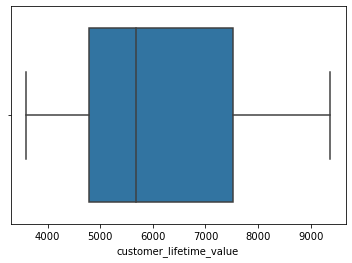

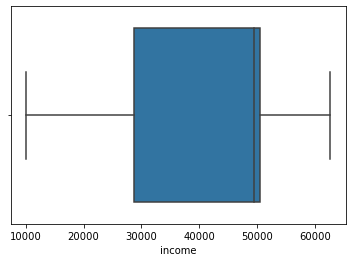

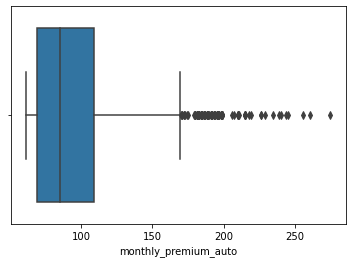

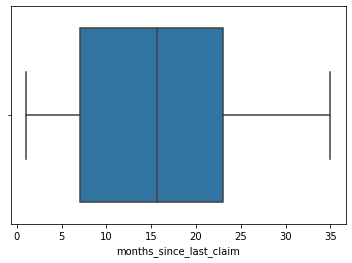

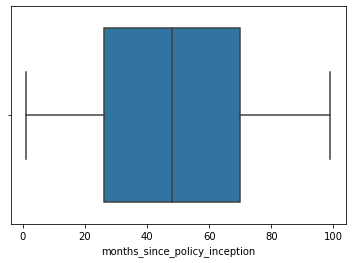

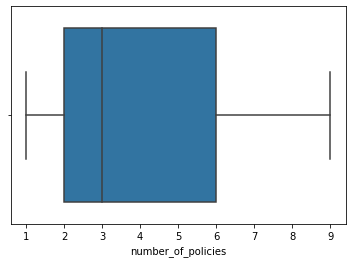

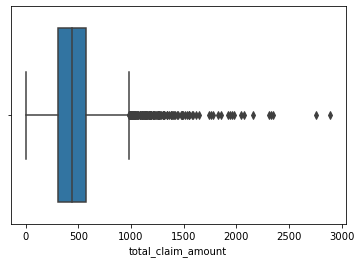

In [50]:
for column in df_num.columns.drop("number_of_open_complaints"):
    sns.boxplot(df_num[column])
    plt.show()

In [55]:
df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

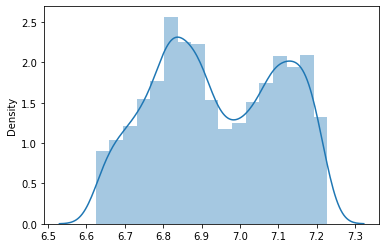

In [56]:
#Normalization.
transformed_data, _ci = stats.boxcox(df_num['customer_lifetime_value'])

sns.distplot(transformed_data)
plt.show()

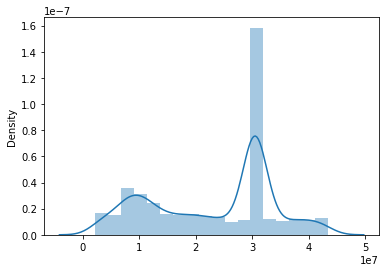

In [57]:
transformed_data, _ci = stats.boxcox(df_num['income'])

sns.distplot(transformed_data)
plt.show()

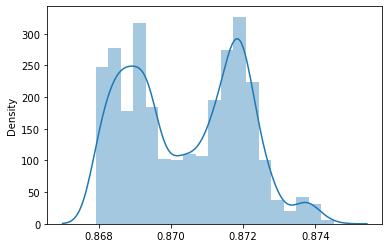

In [62]:
transformed_data, _ci = stats.boxcox(df_num['monthly_premium_auto'])

sns.distplot(transformed_data)
plt.show()

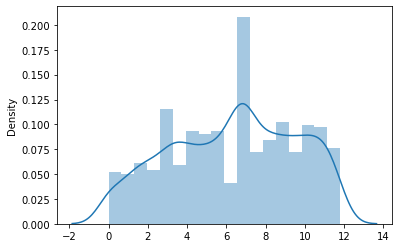

In [63]:
transformed_data, _ci = stats.boxcox(df_num['months_since_last_claim'])

sns.distplot(transformed_data)
plt.show()

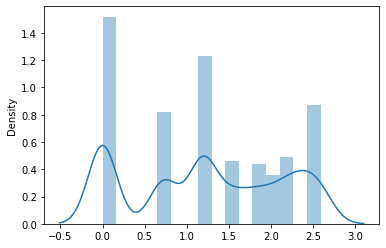

In [66]:
transformed_data, _ci = stats.boxcox(df_num['number_of_policies'])

sns.distplot(transformed_data)
plt.show()

In [67]:
transformer = Normalizer().fit(x_num)
x_normalized = transformer.transform(x_num)
print(x_normalized.shape)

(9134, 8)


In [61]:
transformer = StandardScaler() 
transformer.fit(x_num)

x_standardized = transformer.transform(x_num)
x_standardized.shape
pd.DataFrame(x_standardized)

,0,1,2,3,4,5,6,7
0,0.0,-0.762878,2.770661e-01,-0.703925,1.693885,-1.580734,8.720055e-16,-0.822648
1,0.0,-0.149245,3.465318e-16,0.022691,-0.272676,-0.236367,8.720055e-16,2.106160
2,0.0,0.710636,-8.046961e-02,0.429596,0.244840,-0.381704,8.720055e-16,-0.404247
3,0.0,-0.052263,3.465318e-16,0.371467,0.244840,0.599320,8.720055e-16,1.687759
4,0.0,-0.755575,-3.153182e-01,-0.587666,-0.376179,-0.163699,8.720055e-16,-0.822648
...,...,...,...,...,...,...,...,...
9129,0.0,2.241590,1.023238e+00,-0.587666,0.244840,1.471342,8.720055e-16,-0.404247
9130,0.0,-0.714411,-1.374161e+00,-0.413278,-0.169173,-0.745047,8.720055e-16,-0.822648
9131,0.0,0.023135,3.465318e-16,-0.238891,-0.686689,-0.418039,2.227549e+00,-0.404247
9132,0.0,-0.069935,-1.358111e+00,0.080820,1.900892,-1.653403,8.720055e-16,0.014154


In [101]:
#Encoding Categorical Data.
df_obj['state'].value_counts() 

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [105]:
df_obj['coverage'].value_counts() 

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [106]:
df_obj['education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

In [107]:
df_obj['employmentstatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

In [111]:
df_obj['gender'].value_counts()

F    4658
M    4476
Name: gender, dtype: int64

In [110]:
df_obj['policy_type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [113]:
df_obj['policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [112]:
df_obj['renew_offer_type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

In [108]:
df_obj['sales_channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

In [109]:
df_obj['vehicle_class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

In [114]:
df_obj['vehicle_size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

In [115]:
df_obj_2 = df_obj[['policy_type','vehicle_class', 'coverage', 'sales_channel', 'vehicle_size', 'education', 'state',
                   'renew_offer_type', 'policy', 'policy_type', 'gender', 'employmentstatus']]
df_obj_2 

,policy_type,vehicle_class,coverage,sales_channel,vehicle_size,education,state,renew_offer_type,policy,policy_type,gender,employmentstatus
0,Corporate Auto,Two-Door Car,Basic,Agent,Medsize,Bachelor,Washington,Offer1,Corporate L3,Corporate Auto,F,Employed
1,Personal Auto,Four-Door Car,Extended,Agent,Medsize,Bachelor,Arizona,Offer3,Personal L3,Personal Auto,F,Unemployed
2,Personal Auto,Two-Door Car,Premium,Agent,Medsize,Bachelor,Nevada,Offer1,Personal L3,Personal Auto,F,Employed
3,Corporate Auto,SUV,Basic,Call Center,Medsize,Bachelor,California,Offer1,Corporate L2,Corporate Auto,M,Unemployed
4,Personal Auto,Four-Door Car,Basic,Agent,Medsize,Bachelor,Washington,Offer1,Personal L1,Personal Auto,M,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
9129,Personal Auto,Four-Door Car,Basic,Web,Medsize,Bachelor,California,Offer2,Personal L1,Personal Auto,M,Employed
9130,Corporate Auto,Four-Door Car,Extended,Branch,Medsize,College,California,Offer1,Corporate L3,Corporate Auto,F,Employed
9131,Corporate Auto,Four-Door Car,Extended,Branch,Medsize,Bachelor,California,Offer1,Corporate L2,Corporate Auto,M,Unemployed
9132,Personal Auto,Four-Door Car,Extended,Branch,Large,College,California,Offer3,Personal L2,Personal Auto,M,Employed


In [117]:
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(df_obj_2)

encoded = encoder.transform(df_obj_2).toarray()
encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [118]:
encoded.shape

(9134, 40)

In [ ]:
#Splitting into train set and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 05 - Modeling

Apply model.

In [78]:
# apply model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [79]:
predictions  = model.predict(X_test)
predictions.shape

(2741,)

## 06 - Model Validation

- R2.
- MSE.
- RMSE.
- MAE.

In [95]:
R2 = r2_score(y_test, predictions)
print("R2:", R2)

R2: 0.5975786395916275


In [96]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

MSE: 32851.38945928823


In [85]:
rmse = math.sqrt(mse)
print("RMSE:", rmse)

181.24952264568375


In [97]:
MAE = mean_absolute_error(y_test, predictions)
print("MAE:", MAE )

MAE: 136.42844034821923


## 07 - Reporting

Present results.

In [87]:
results = pd.DataFrame()

results['true'] = y_test
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results


,true,pred,resid
708,218.598065,452.424731,233.826666
47,447.793440,429.214399,18.579041
3995,451.200000,271.257826,179.942174
1513,355.641958,281.433657,74.208301
3686,470.097411,364.826225,105.271186
...,...,...,...
4271,518.400000,649.030372,130.630372
7923,650.521790,748.890210,98.368420
5633,652.800000,670.289492,17.489492
8432,150.878447,302.192782,151.314335


In [92]:
results.describe()

,true,pred,resid
count,2741.000000,2741.000000,2741.000000
mean,431.907702,453.405299,136.428440
std,285.769316,295.240905,119.347672
min,0.382107,-179.282930,0.173143
25%,268.471802,253.675952,51.427323
50%,386.031248,434.079995,110.486608
75%,550.825934,647.619847,188.982631
max,2759.794354,1666.377649,1261.247521
